# Jacarandas of Los Angeles County

In [237]:
import pandas as pd
import geopandas as gpd
import jenkspy
import matplotlib.pyplot as plt
%matplotlib inline
import json
import numpy as np
from altair import datum
import altair as alt
import shapely
import altair_latimes as lat

In [238]:
alt.themes.register('latimes', lat.theme)
alt.themes.enable('latimes')
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000
alt.data_transformers.disable_max_rows()
pd.options.display.max_colwidth = None

### Trees in all cities

In [239]:
trees = gpd.read_file('/Users/mhustiles/data/data/treesold/all_trees.shp')

In [240]:
trees['place_label'] = trees['place'].str.replace("_", " ").str.title()

In [241]:
trees.head()

,place,ispalm,species,category,geometry,place_label
0,pasadena,n,no room for replant,other,POINT (-118.17635 34.15406),Pasadena
1,los_angeles_city,n,scarlet bottlebrush,other,POINT (-118.25420 34.10675),Los Angeles City
2,long_beach,y,mexican fan palm,palm,POINT (-118.12397 33.79612),Long Beach
3,long_beach,y,mexican fan palm,palm,POINT (-118.12387 33.79612),Long Beach
4,long_beach,y,mexican fan palm,palm,POINT (-118.12378 33.79611),Long Beach


### LA County neighborhoods

In [242]:
neighborhoods = gpd.read_file('input/cities-neighborhoods-unincorporated-la-county-deleted-islands.geojson')

In [249]:
neighborhoods = neighborhoods.to_crs('epsg:4326')

In [ ]:
trees_df = gpd.sjoin(trees, neighborhoods, op='within')

In [255]:
trees_df.columns = trees_df.columns.str.lower()

### Just the Jacaranda

In [256]:
jacaranda = trees_df[trees_df['species'] == 'jacaranda'].reset_index(drop=True)

In [257]:
len(jacaranda)

In [299]:
jacaranda.head()

,place,ispalm,species,category,geometry,place_label,index_right,name
0,pasadena,n,jacaranda,jacaranda,POINT (-118.15560 34.12412),Pasadena,115,Pasadena
1,pasadena,n,jacaranda,jacaranda,POINT (-118.15570 34.12412),Pasadena,115,Pasadena
2,pasadena,n,jacaranda,jacaranda,POINT (-118.16223 34.20012),Pasadena,115,Pasadena
3,pasadena,n,jacaranda,jacaranda,POINT (-118.15684 34.13957),Pasadena,115,Pasadena
4,pasadena,n,jacaranda,jacaranda,POINT (-118.09406 34.15782),Pasadena,115,Pasadena


### Toptal by place/neighborhood

In [268]:
jacaranda_totals = jacaranda.groupby(['name']).agg({'species':'count'}).reset_index()

In [270]:
city_totals = trees_df.groupby(['name']).agg({'species':'count'}).reset_index()

In [287]:
cities_jacarandas = jacaranda_totals.merge(city_totals, on='name')

In [288]:
cities_jacarandas.rename(columns={'species_x':'jacarandas', 'species_y':'total'}, inplace=True)

In [289]:
cities_jacarandas['share'] = ((cities_jacarandas['jacarandas'] / cities_jacarandas['total'])*100).round(2)

### Places with a high share of jacarandas

In [290]:
cities_jacarandas.sort_values('share', ascending=False).head(10)

,name,jacarandas,total,share
0,Adams-Normandie,131,709,18.48
202,West Rancho Dominguez,54,299,18.06
22,Cadillac-Corning,82,522,15.71
199,West Hollywood,1417,9041,15.67
51,East Rancho Dominguez,2,16,12.50
42,Del Aire,70,581,12.05
91,Ladera Heights,191,1612,11.85
89,La Rambla,9,76,11.84
207,Westlake,72,632,11.39
151,San Pasqual,65,577,11.27


### Places with a high jacarandas count

In [291]:
cities_jacarandas.sort_values('jacarandas', ascending=False).head(10)

,name,jacarandas,total,share
103,Long Beach,6793,140796,4.82
67,Glendale,2031,56764,3.58
209,Whittier,1774,28381,6.25
129,Pasadena,1684,71104,2.37
199,West Hollywood,1417,9041,15.67
16,Beverly Hills,1382,26902,5.14
24,Carson,1353,22519,6.01
133,Pomona,1019,50508,2.02
155,Santa Monica,927,34966,2.65
30,Cerritos,828,24567,3.37


---

### Bin the trees

In [292]:
bins = gpd.read_file('input/halfmile.geojson')

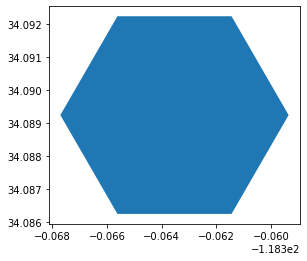

In [327]:
bins[bins['id'] == 5130].plot()

In [302]:
jacaranda.drop(['index_right'], axis=1, inplace=True)

In [303]:
bins_jacarandas = gpd.sjoin(jacaranda, bins, op='within')

In [319]:
bins_jacarandas.head()

,place,ispalm,species,category,geometry,place_label,name,index_right,left,top,right,bottom,id
85,pasadena,n,jacaranda,jacaranda,POINT (-118.17550 34.12696),Pasadena,Pasadena,68,-1.315573e+07,4.046022e+06,-1.315480e+07,4.045217e+06,8304
345,pasadena,n,jacaranda,jacaranda,POINT (-118.17206 34.12895),Pasadena,Pasadena,150,-1.315503e+07,4.046424e+06,-1.315410e+07,4.045619e+06,8409
531,pasadena,n,jacaranda,jacaranda,POINT (-118.17133 34.12930),Pasadena,Pasadena,150,-1.315503e+07,4.046424e+06,-1.315410e+07,4.045619e+06,8409
523,pasadena,n,jacaranda,jacaranda,POINT (-118.18259 34.13197),Pasadena,Pasadena,3597,-1.315642e+07,4.047229e+06,-1.315549e+07,4.046424e+06,8196
803,pasadena,n,jacaranda,jacaranda,POINT (-118.18414 34.13532),Pasadena,Pasadena,3597,-1.315642e+07,4.047229e+06,-1.315549e+07,4.046424e+06,8196


In [323]:
jac_grp = bins_jacarandas.groupby(['id', 'name']).size().reset_index(name='count')

In [325]:
jac_grp.sort_values('count', ascending=False)

In [332]:
jac_grp_geo = bins.merge(jac_grp, on='id')

In [336]:
jac_grp_geo.drop(['left','top','right','bottom'], axis=1, inplace=True)

In [340]:
jac_grp_geo.sort_values('count', ascending=False)

,id,geometry,name,count
1403,5130,"POLYGON ((-118.36771 34.08924, -118.36562 34.09223, -118.36145 34.09223, -118.35936 34.08924, -118.36145 34.08625, -118.36562 34.08625, -118.36771 34.08924))",West Hollywood,140
266,4708,"POLYGON ((-118.38440 34.07727, -118.38649 34.07427, -118.39066 34.07427, -118.39275 34.07727, -118.39066 34.08026, -118.38649 34.08026, -118.38440 34.07727))",Beverly Hills,136
180,5023,"POLYGON ((-118.37397 34.09223, -118.37188 34.09523, -118.36771 34.09523, -118.36562 34.09223, -118.36771 34.08924, -118.37188 34.08924, -118.37397 34.09223))",West Hollywood,136
264,4709,"POLYGON ((-118.39066 34.07427, -118.38649 34.07427, -118.38440 34.07128, -118.38649 34.06829, -118.39066 34.06829, -118.39275 34.07128, -118.39066 34.07427))",Beverly Hills,135
267,4708,"POLYGON ((-118.38440 34.07727, -118.38649 34.07427, -118.39066 34.07427, -118.39275 34.07727, -118.39066 34.08026, -118.38649 34.08026, -118.38440 34.07727))",West Hollywood,128
...,...,...,...,...
1433,5210,"POLYGON ((-118.35936 34.24474, -118.35519 34.24474, -118.35310 34.24176, -118.35519 34.23877, -118.35936 34.23877, -118.36145 34.24176, -118.35936 34.24474))",Sunland,1
1432,5204,"POLYGON ((-118.35519 34.28059, -118.35310 34.27760, -118.35519 34.27462, -118.35936 34.27462, -118.36145 34.27760, -118.35936 34.28059, -118.35519 34.28059))",Lakeview Terrace,1
786,3744,"POLYGON ((-118.44909 34.13413, -118.44700 34.13712, -118.44283 34.13712, -118.44074 34.13413, -118.44283 34.13114, -118.44700 34.13114, -118.44909 34.13413))",Sherman Oaks,1
794,3763,"POLYGON ((-118.44909 34.02037, -118.44700 34.02337, -118.44283 34.02337, -118.44074 34.02037, -118.44283 34.01737, -118.44700 34.01737, -118.44909 34.02037))",Santa Monica,1


---

### Export

In [337]:
jacaranda.to_file('output/jacaranda.geojson', driver='GeoJSON')

In [338]:
jac_grp_geo.to_file('output/jac_grp_geo.geojson', driver='GeoJSON')

In [70]:
# !tippecanoe --generate-ids --force -r1 -pk -pf -o \
# output/jacaranda.mbtiles \
# output/jacaranda.geojson

For layer 0, using name "jacaranda"
15388 features, 592547 bytes of geometry, 16 bytes of separate metadata, 620701 bytes of string pool
  99.9%  14/2802/6527  
